In [29]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [21]:
df=pd.read_csv("auto-mpg.csv")
print(df.head())

    mpg  cylinders  displacement horsepower  weight  acceleration  model year  \
0  18.0          8         307.0        130    3504          12.0          70   
1  15.0          8         350.0        165    3693          11.5          70   
2  18.0          8         318.0        150    3436          11.0          70   
3  16.0          8         304.0        150    3433          12.0          70   
4  17.0          8         302.0        140    3449          10.5          70   

   origin                   car name  
0       1  chevrolet chevelle malibu  
1       1          buick skylark 320  
2       1         plymouth satellite  
3       1              amc rebel sst  
4       1                ford torino  


In [43]:
#df["housepower"]=df["horsepower"].replace('?',pd.NA)
#df["horsepower"]=pd.to_numeric(df['horsepower'],errors='coerce')
#df = df.dropna()
#df = df.reset_index(drop=True)

In [53]:
print(df.info())
print(df.notnull())
#print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392 entries, 0 to 391
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           392 non-null    float64
 1   cylinders     392 non-null    int64  
 2   displacement  392 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        392 non-null    int64  
 5   acceleration  392 non-null    float64
 6   model year    392 non-null    int64  
 7   origin        392 non-null    int64  
 8   car name      392 non-null    object 
 9   housepower    392 non-null    object 
dtypes: float64(4), int64(4), object(2)
memory usage: 30.8+ KB
None
      mpg  cylinders  displacement  horsepower  weight  acceleration  \
0    True       True          True        True    True          True   
1    True       True          True        True    True          True   
2    True       True          True        True    True          True   
3    True       True   

In [55]:
features=['cylinders','displacement','horsepower','weight','acceleration','model year']
X=df[features]
y=df['mpg']

In [57]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [59]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [83]:
from sklearn.metrics import mean_squared_error,r2_score
import numpy as np
y_pred=model.predict(X_test)
mse=mean_squared_error(y_test,y_pred)
print("R^2 Score:",r2_score(y_test,y_pred))
rmse=np.sqrt(mse)
print("RMSE:",rmse)
print("MSE:",mse)

R^2 Score: 0.7942349075428584
RMSE: 3.2407360783342627
MSE: 10.502370329417335


In [87]:
new_car=[[4,140,90,2264,15.5,82]]
car2=[[4,	98,	79,	2255,	17.7	,76
]]
print("MPG predicted:",model.predict(new_car)* 0.425144)

MPG predicted: [13.98278891]


C:\Users\athav\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


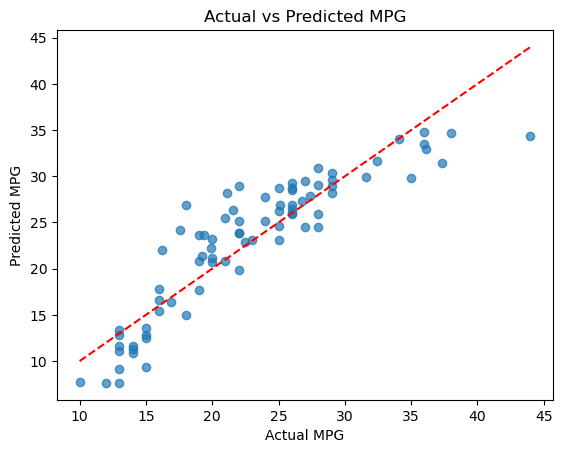

In [85]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred, alpha=0.7)
plt.xlabel("Actual MPG")
plt.ylabel("Predicted MPG")
plt.title("Actual vs Predicted MPG")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # perfect line
plt.show()